In [9]:
import numpy as np
import pandas as pd
from functions import generate_data, get_weighted_sum, sigmoid, cross_entropy, update_weights, update_bias   # script for storing the functions

In [55]:

bias = 0.5
l_rate = 0.001 # try and change these to see the difference
epochs = 700 # try and change these to see the difference
epoch_loss = []

data, weights = generate_data(50,3)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)):
            feature = data.loc[i][:-1] # get 1 row at a time. [:-1] means every column EXCEPT the last
            target = data.iloc[i,-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            #gradient descent
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
        print("**********************")
        print("epoch: ", e)
        print(average_loss)
        
train_model(data, weights, bias, l_rate, epochs)


**********************
epoch:  0
0.34748112818785254
**********************
epoch:  1
0.3454960822260356
**********************
epoch:  2
0.3435681278050788
**********************
epoch:  3
0.3416962605793469
**********************
epoch:  4
0.3398794588305528
**********************
epoch:  5
0.3381166855703064
**********************
epoch:  6
0.33640689061568385
**********************
epoch:  7
0.33474901263045453
**********************
epoch:  8
0.3331419811251301
**********************
epoch:  9
0.3315847184095422
**********************
epoch:  10
0.33007614149223047
**********************
epoch:  11
0.3286151639214914
**********************
epoch:  12
0.3272006975635196
**********************
epoch:  13
0.32583165431365785
**********************
epoch:  14
0.324506947737338
**********************
epoch:  15
0.3232254946378647
**********************
epoch:  16
0.32198621654873144
**********************
epoch:  17
0.32078804114869763
**********************
epoch:  18
0.31962990359834

<Axes: >

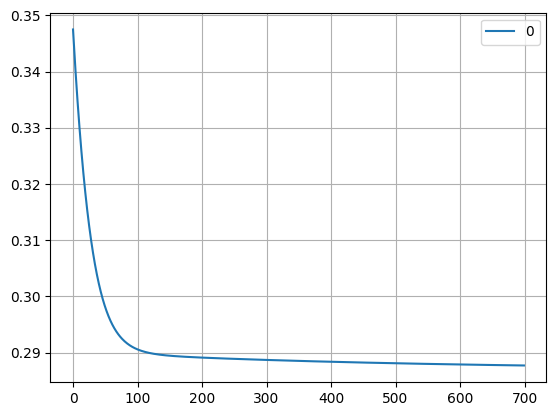

In [56]:
# plot the average loss
df = pd.DataFrame(epoch_loss)
df.plot(kind="line", grid=True)